**Recreating the results of the thyroid classification dataset and attaing .99 F1 scores using similar parameters**    
Followed by various sampling methods to expand the dataset while retaining F1 scores of newly trained model on the original, real dataset    



In [123]:
import pandas as pd 
df = pd.read_csv('/Users/doctorflu/Desktop/disease_pred/datasets/thyroidDF.csv')
df00 = df
print (df.head())


   age sex on_thyroxine query_on_thyroxine on_antithyroid_meds sick pregnant  \
0   29   F            f                  f                   f    f        f   
1   29   F            f                  f                   f    f        f   
2   41   F            f                  f                   f    f        f   
3   36   F            f                  f                   f    f        f   
4   32   F            f                  f                   f    f        f   

  thyroid_surgery I131_treatment query_hypothyroid  ...    TT4 T4U_measured  \
0               f              f                 t  ...    NaN            f   
1               f              f                 f  ...  128.0            f   
2               f              f                 f  ...    NaN            f   
3               f              f                 f  ...    NaN            f   
4               f              f                 f  ...    NaN            f   

  T4U FTI_measured FTI TBG_measured   TBG  r

In [124]:
count = df['target'].value_counts()
df1 = count[count > 230].index #choosing target classes with over 230 samples (5 classes)
print (f'The selected target classes for initial analysis are {df1}')
print (f'The counts of all target classes is \n{count}')

The selected target classes for initial analysis are Index(['-', 'K', 'G', 'I', 'F'], dtype='object')
The counts of all target classes is 
-      6771
K       436
G       359
I       346
F       233
R       196
A       147
L       115
M       111
N       110
S        85
GK       49
AK       46
J        30
B        21
MK       16
Q        14
O        14
C|I      12
KJ       11
GI       10
H|K       8
D         8
FK        6
C         6
P         5
MI        2
LJ        1
GKJ       1
OI        1
D|R       1
E         1
Name: target, dtype: int64


In [125]:
target_labels = {
    '-'  : 'Normal',
    'K' :  'concurrent non-thyroidal illness',
    'G' : 'compensated hypothyroid',
    'I'  : 'increased binding protein',
    'F'  : 'primary hypothyroid',
    'R' : 'discordant assay results',
    'A' : 'hyperthyroid'
}

df_t = df[df['target'].isin(df1)] #dataframe containing only target label classes
df_t = df_t[df_t['target'] != '-'] #removing all normal samples


In [126]:
indices1 = df[df['target'] == '-'].index

def rand_select(x):
    return pd.Series(x).sample(n=400, random_state=1) #randomly selecting 400 normal patients data points and saving them

In [127]:
df1 = df.loc[rand_select(indices1)]
df_f = pd.concat([df1, df_t], axis= 0) #recreated training dataset
count = df_f['target'].value_counts()
print (f'The data count of target labels are \n{count}')
print (df1.shape)

The data count of target labels are 
K    436
-    400
G    359
I    346
F    233
Name: target, dtype: int64
(400, 31)


In [128]:
print (df_f.tail()) #dataset used in research paper 

      age sex on_thyroxine query_on_thyroxine on_antithyroid_meds sick  \
9149   75   F            t                  f                   f    f   
9153   64   M            f                  f                   f    f   
9157   60   M            f                  f                   t    f   
9162   36   F            f                  f                   f    f   
9169   69   M            f                  f                   f    f   

     pregnant thyroid_surgery I131_treatment query_hypothyroid  ...    TT4  \
9149        f               f              f                 t  ...   54.0   
9153        f               f              f                 f  ...   31.0   
9157        f               f              f                 f  ...   28.0   
9162        f               f              f                 f  ...   84.0   
9169        f               f              f                 f  ...  113.0   

     T4U_measured   T4U FTI_measured   FTI TBG_measured TBG  referral_source  \
9149  

In [129]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier


X = df_f.drop('target', axis= 1) #initialising training and testing data
y = df_f['target']
print (X.shape, df_f.shape, y.shape)

(1774, 30) (1774, 31) (1774,)


In [130]:
#One hot encoding all the binary data
cols_encode = ['sex','on_thyroxine','query_on_thyroxine',	'on_antithyroid_meds'	,'sick','pregnant',	'thyroid_surgery',	'I131_treatment',	'query_hypothyroid','query_hyperthyroid','lithium',	'goitre','tumor',	'hypopituitary',	'psych','TSH_measured','T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured', 'referral_source']
X = pd.get_dummies(X, columns= cols_encode)
print (X.shape) #one hot encoded binary responses in input data

(1774, 56)


In [131]:
X.fillna(-1, inplace= True) #fill empty cells with -1 value for model to ignore
X.tail()

,age,TSH,T3,TT4,T4U,FTI,TBG,patient_id,sex_F,sex_M,...,FTI_measured_f,FTI_measured_t,TBG_measured_f,TBG_measured_t,referral_source_STMW,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_WEST,referral_source_other
9149,75,18.00,-1.0,54.0,1.03,53.0,-1.0,870116038,1,0,...,0,1,1,0,0,0,0,1,0,0
9153,64,0.81,-1.0,31.0,0.55,56.0,-1.0,870116043,0,1,...,0,1,1,0,0,0,0,1,0,0
9157,60,0.18,-1.0,28.0,0.87,32.0,-1.0,870116053,0,1,...,0,1,1,0,0,0,0,0,0,1
9162,36,-1.00,-1.0,84.0,1.26,67.0,-1.0,870119008,1,0,...,0,1,1,0,0,0,0,0,0,1
9169,69,-1.00,-1.0,113.0,1.27,89.0,-1.0,870119025,0,1,...,0,1,1,0,0,0,0,1,0,0


In [132]:
#Using original features to train intital model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 0)
model1 = RandomForestClassifier(n_estimators= 200, max_depth= 20)
model1.fit(X_train, y_train) #training the model using original feature set


RandomForestClassifier(max_depth=20, n_estimators=200)

In [133]:
y_pred = model1.predict(X_test)
s1 = model1.score(X_test, y_test) #evaluating model performance
print (f'RFC with original features performs with an accuracy of {s1} ')

RFC with original features performs with an accuracy of 0.9746478873239437 


In [134]:
#using Machine learning feature selection 
etc = ExtraTreesClassifier(n_estimators=200, max_depth= 20, random_state= 1)
etc.fit(X,y)#calculating feature importance scores
sfm = SelectFromModel(etc, threshold= 0.015)
sfm.fit(X, y) #fitting threshold values of feature importance
X_mlfs = sfm.transform(X)
print (f' Shape of selected features dataset is {X_mlfs.shape}')

 Shape of selected features dataset is (1774, 12)


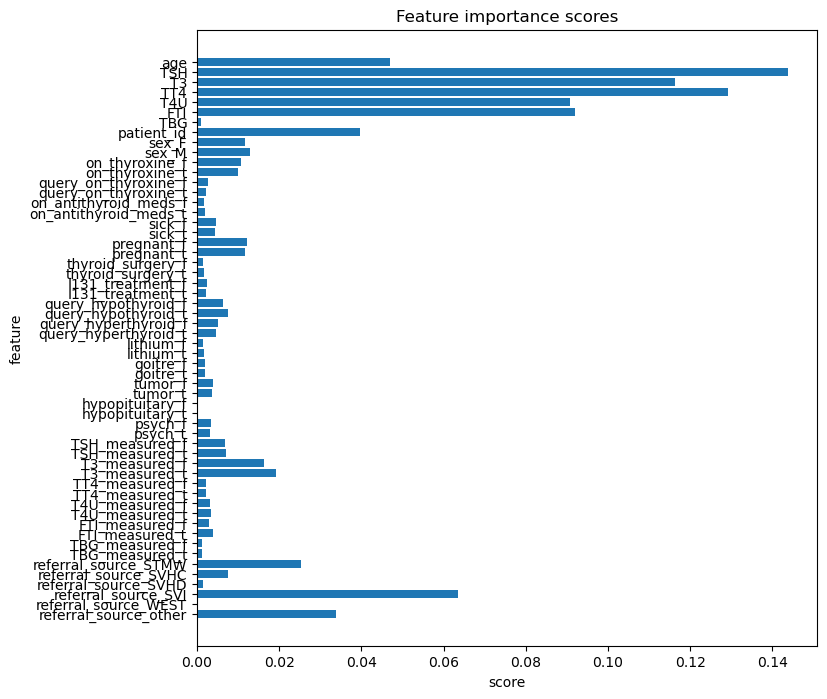

In [135]:
#Feature importance graph
import matplotlib.pyplot as plt
feature_names = X.columns
feat_imp = etc.feature_importances_
plt.figure(figsize= (8,8))
plt.barh(feature_names, feat_imp)
plt.title('Feature importance scores')
plt.ylabel('feature')
plt.xlabel('score')
plt.gca().invert_yaxis()
plt.show()


In [136]:
etc1 = SelectFromModel(RandomForestClassifier(n_estimators=200, max_depth=20, random_state=1), threshold=0.015) #running feature importance calculations
X_select = etc1.fit_transform(X, y)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_select, y, test_size= 0.2, random_state= 1)

print(f'Shape of training dataset is {X_select}]')
print(X_select.shape)

selected_feat1 = etc1.get_support()
selected_cols1 = X.columns[selected_feat1]
print (selected_cols1)


Shape of training dataset is [[62.    1.1   2.3  ...  1.    0.    1.  ]
 [40.    1.1   1.8  ...  1.    0.    1.  ]
 [15.    3.1  -1.   ...  0.    0.    1.  ]
 ...
 [60.    0.18 -1.   ...  0.    0.    1.  ]
 [36.   -1.   -1.   ...  0.    0.    1.  ]
 [69.   -1.   -1.   ...  0.    1.    0.  ]]]
(1774, 11)
Index(['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'patient_id', 'T3_measured_f',
       'T3_measured_t', 'referral_source_SVI', 'referral_source_other'],
      dtype='object')


In [137]:
# training model on selected features 
mod_v1 = RandomForestClassifier(n_estimators=200, max_depth=20) #model with selected MLFS features
mod_v1.fit(X_train1, y_train1)
mod_v1.score(X_test1, y_test1)

0.9774647887323944

In [138]:
#Using 10 fold CV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score, recall_score
kf = KFold(n_splits=10, shuffle= True, random_state=1) #setting parameters for cros validation
score = cross_val_score(mod_v1, X_select, y, cv= kf, scoring= 'accuracy')#setting scoring criteria



In [139]:
import numpy as np
#Accuracy and Recall Scores of Original Model 
acc_scores = []
rec_scores = []
#initialising for loop to select training splits
for fold, (train_idx, test_idx) in enumerate(kf.split(X_select, y)): 
    X_train, X_test = X_select[train_idx], X_select[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    mod_v1.fit(X_train, y_train)
    y_pred = mod_v1.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    acc_scores.append(accuracy)

    recall = recall_score(y_test, y_pred, average= 'macro')
    rec_scores.append(recall)

    print (f'For fold {fold+1} - Accuracy :{accuracy:.4f}, Recall :{recall:.4f}')

mean_accuracy = sum(acc_scores)/ len(acc_scores)
mean_recall = sum(rec_scores)/ len(rec_scores)

std_accuracy = np.std(acc_scores)
std_recall = np.std(rec_scores)

print (f'Mean accuracy is :{mean_accuracy:.4f} and the standard deviation across folds is {std_accuracy:.4f}')
print (f'Mean recall is :{mean_recall:.4f} and the standard deviation across folds is {std_recall:.4f}')

For fold 1 - Accuracy :0.9607, Recall :0.9647
For fold 2 - Accuracy :0.9944, Recall :0.9947
For fold 3 - Accuracy :0.9888, Recall :0.9899
For fold 4 - Accuracy :0.9944, Recall :0.9944
For fold 5 - Accuracy :0.9718, Recall :0.9783
For fold 6 - Accuracy :0.9774, Recall :0.9791
For fold 7 - Accuracy :0.9774, Recall :0.9830
For fold 8 - Accuracy :0.9718, Recall :0.9725
For fold 9 - Accuracy :0.9887, Recall :0.9879
For fold 10 - Accuracy :0.9831, Recall :0.9830
Mean accuracy is :0.9808 and the standard deviation across folds is 0.0104
Mean recall is :0.9828 and the standard deviation across folds is 0.0091


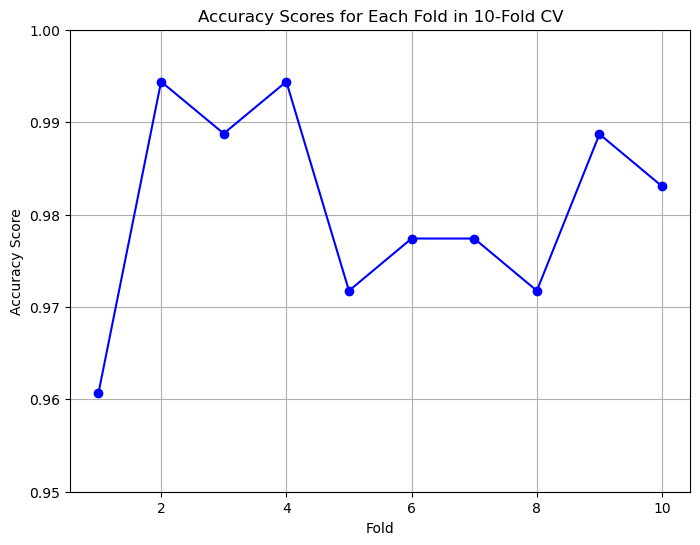

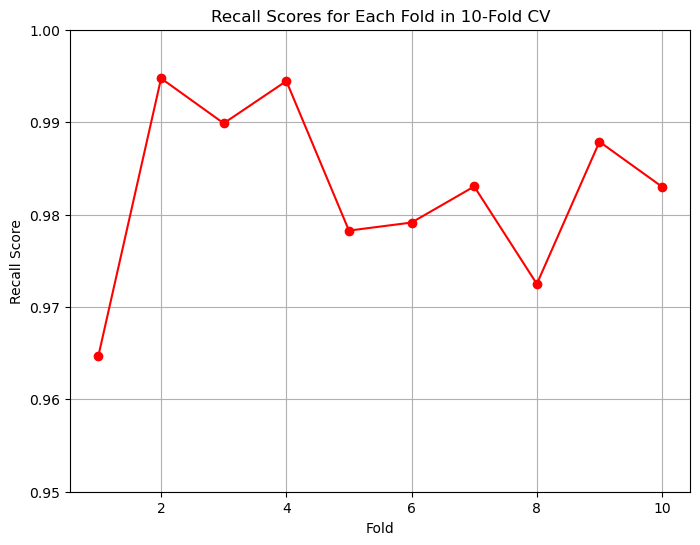

In [161]:
# Plotting accuracy scores
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), acc_scores, marker='o', linestyle='-', color='blue')
plt.title('Accuracy Scores for Each Fold in 10-Fold CV')
plt.xlabel('Fold')
plt.ylabel('Accuracy Score')
plt.ylim(0.95, 1)
plt.grid(True)
plt.show()

# Plotting recall scores
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), rec_scores, marker='o', linestyle='-', color='red')
plt.title('Recall Scores for Each Fold in 10-Fold CV')
plt.xlabel('Fold')
plt.ylabel('Recall Score')
plt.ylim(0.95, 1)
plt.grid(True)
plt.show()

In [162]:
#note - first smote, then select X , y
#implementing SMOTE on data
from imblearn.over_sampling import SMOTE

# sampling 2 target classes above threshold value (R , A)
smote = SMOTE(sampling_strategy= {'R':231 ,'A':231 ,'L':180, 'M':175}, k_neighbors= 5, n_jobs= -1, random_state= 1)
X = df.drop(columns = ['target'])
y = df['target']

X1 = pd.get_dummies(X, cols_encode) #one hot encoding cols
X1.fillna(-1, inplace= True) #filling empty values

print (f' Shape of dataset after encoding is {X1.shape} and target shape is {y.shape}')

 Shape of dataset after encoding is (9172, 56) and target shape is (9172,)


In [163]:
X_t, y_t = smote.fit_resample(X1,y) #applying smote and combining dataframes
df2 = pd.concat([pd.DataFrame(X_t), pd.DataFrame(y_t)], axis= 1) 
count3 = df2['target'].value_counts()

print (f' Increase in number of rows after sampling - shape :{df2.shape}')
print (f' Dataframe shape after smote {df2.shape}')
print (f' Value counts of all target classes after smote is \n{count3}')

 Increase in number of rows after sampling - shape :(9420, 57)
 Dataframe shape after smote (9420, 57)
 Value counts of all target classes after smote is 
-      6771
K       436
G       359
I       346
F       233
R       231
A       231
L       180
M       175
N       110
S        85
GK       49
AK       46
J        30
B        21
MK       16
Q        14
O        14
C|I      12
KJ       11
GI       10
H|K       8
D         8
FK        6
C         6
P         5
MI        2
LJ        1
GKJ       1
OI        1
D|R       1
E         1
Name: target, dtype: int64


/Users/doctorflu/anaconda3/lib/python3.11/site-packages/imblearn/over_sampling/_smote/base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [164]:
count2 = count3[count3 > 230].index

indices2 = df2[df2['target'] == '-'].index
df_temp = df2.loc[rand_select(indices2)]

df_t1 = df2[df2['target'].isin(count2)]
df_t2 = df_t1[df_t1['target'] != '-']

c4 = df_t2['target'].value_counts()

print ({df_t2.shape})
print(f'Value counts of dataset is \n{c4}')

{(1836, 57)}
Value counts of dataset is 
K    436
G    359
I    346
F    233
R    231
A    231
Name: target, dtype: int64


In [165]:
df_t3 = pd.concat([df_temp, df_t2], axis= 0)
print(df_t3.shape)
c5 = df_t3['target'].value_counts()
print (c5)

(2236, 57)
K    436
-    400
G    359
I    346
F    233
R    231
A    231
Name: target, dtype: int64


In [166]:
X2 = df_t2.drop('target', axis=1)
y2 = df_t2['target']

df_temp = pd.DataFrame(df_t2, columns= ['T3_measured_t'])

#using MLFS features and splitting data
X3 = etc1.fit_transform(X2, y2)
selected_feat = etc1.get_support()

X_t = pd.DataFrame(X3, columns= X2.columns[selected_feat])
X_t.reset_index(drop= True, inplace= True)
df_temp.reset_index(drop= True, inplace= True)
y2.reset_index(drop = True, inplace= True)

X4 = pd.concat([X_t, df_temp], axis= 1)
combined_data = pd.concat([X4, y2], axis= 1)
#testing split from below data will not be used 
train_comb, test_comb = train_test_split(combined_data, test_size=0.2, random_state= 1)

train_comb.fillna(-1, inplace= True)

X_train2 = train_comb.drop('target', axis= 1)
y_train2 = train_comb['target']
print (f' Shape of new dataframe for training inclusing the samples is {X_train2}')
print (f'{X3.shape}')

selected_cols = X2.columns[selected_feat]
print (X_train2.shape)

 Shape of new dataframe for training inclusing the samples is        age         TSH         T3         TT4       T4U         FTI  \
623   60.0  400.000000   0.500000   11.000000  1.190000    9.099999   
726   68.0   15.000000   2.000000   81.000000  1.010000   81.000000   
1786  70.0    0.081594   3.605219  153.263753  0.925261  166.053598   
418   38.0    0.150000   4.300000  144.000000  1.620000   89.000000   
816   76.0    7.500000   2.100000   89.000000  1.140000   78.000000   
...    ...         ...        ...         ...       ...         ...   
905   68.0    6.700000   1.400000  101.000000 -1.000000   -1.000000   
1791  46.0    0.067195  11.547144  321.574464  0.814860  440.512871   
1096  71.0    1.200000  -1.000000  156.000000  0.950000  164.000000   
235   57.0    0.050000   3.700000  244.000000  0.950000  256.000000   
1061  85.0  197.000000  -1.000000   -1.000000 -1.000000   -1.000000   

       patient_id  T3_measured_t  referral_source_SVI  referral_source_other  \
623  

In [167]:
#training the model on original + sampled data
mod_v2 = RandomForestClassifier(n_estimators=200, max_depth= 20)
mod_v2.fit(X_train2, y_train2)
mod_v2.score(X_test1, y_test1) #.76 prediction score with initital smote analysis

/Users/doctorflu/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0.7774647887323943